# Cloud Classification Maps

Emily Luschen, emily.w.luschen-1@ou.edu \
James Ruppert, jruppert@ou.edu \
7/10/2023

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, rc, ticker
import cartopy.crs as ccrs
import master_functions as mf

In [2]:
# Load in classification schemes

# New class
c_type = mf.var_read_edges('/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/cloud_class/precip_class_ctl.nc', 'type') # 1=deep convective; 2=congestus; 3=shallow convective; 4=stratiform; 5=anvil; 0=non-precipitating

# Reflectivity class
pclass_trad = '/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_01/ctl/post/d02/strat.nc' # 1=convective; 2=stratiform; 3=anvil; 0=non-precipitating
c_type_og = mf.var_read_edges(pclass_trad, 'strat')
print(c_type_og.shape)
c_type_og = c_type_og[36].copy()

# WRF output file for haiyan 36 hours
wrfout = '/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_01/ctl/wrfout_d02_2013-11-02_12:00:00'


(97, 740, 1200)


In [3]:
# Read in longitude
varname='lat'
lat = mf.var_wrfread_edges(wrfout,varname) # latitude
varname='lon'
lon = mf.var_wrfread_edges(wrfout,varname) # latitude
lon1d=lon[0,:]
lat1d=lat[:,0]

In [4]:
# find edges for plot
# buffer for edges
buf = 80

# t_edge = lat[buf,buf]
# b_edge = lat[740-buf-1,buf]
# l_edge = lon[buf,buf]
# r_edge = lon[buf,1200-buf-1]

# xmin = 250
# boundaries to zoom in on convection
xmax = 450
ymin = 350
ymax = 800

t_edge = lat[xmax,ymin]
b_edge = lat[buf,ymin]
l_edge = lon[buf,ymin]
r_edge = lon[buf,ymax]
print(t_edge, b_edge)
print(l_edge, r_edge)

11.391769 -0.06099701
154.92706 168.9483


In [5]:
# universal plotting parameters
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

rc('font', **font)

### classification comparison plot

In [6]:
# Read in QRAIN @ 36 hours
file= '/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_01/ctl/post/d02/QRAIN.nc'
qrain = mf.var_read_edges(file, 'QRAIN')
qrain = qrain[36].copy() # level x lat x lon
print(qrain.shape)
# qrain = qrain*10**5

# Read in LW ACRE @ 36 hours
file= '/ourdisk/hpc/radclouds/auto_archive_notyet/tape_2copies/tc_ens/haiyan/memb_01/ctl/post/d02/LWacre.nc'
acre = mf.var_read_edges(file, 'LWUPB')
acre = acre[36].copy() # lat x lon
print(acre.shape)

(20, 740, 1200)
(740, 1200)


/home/eluschen/.conda/envs/py_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: Log scale: values of z <= 0 have been masked
  result = super().contourf(*args, **kwargs)


Text(0.5, 1.0, 'd) 1000 hPa QRain')

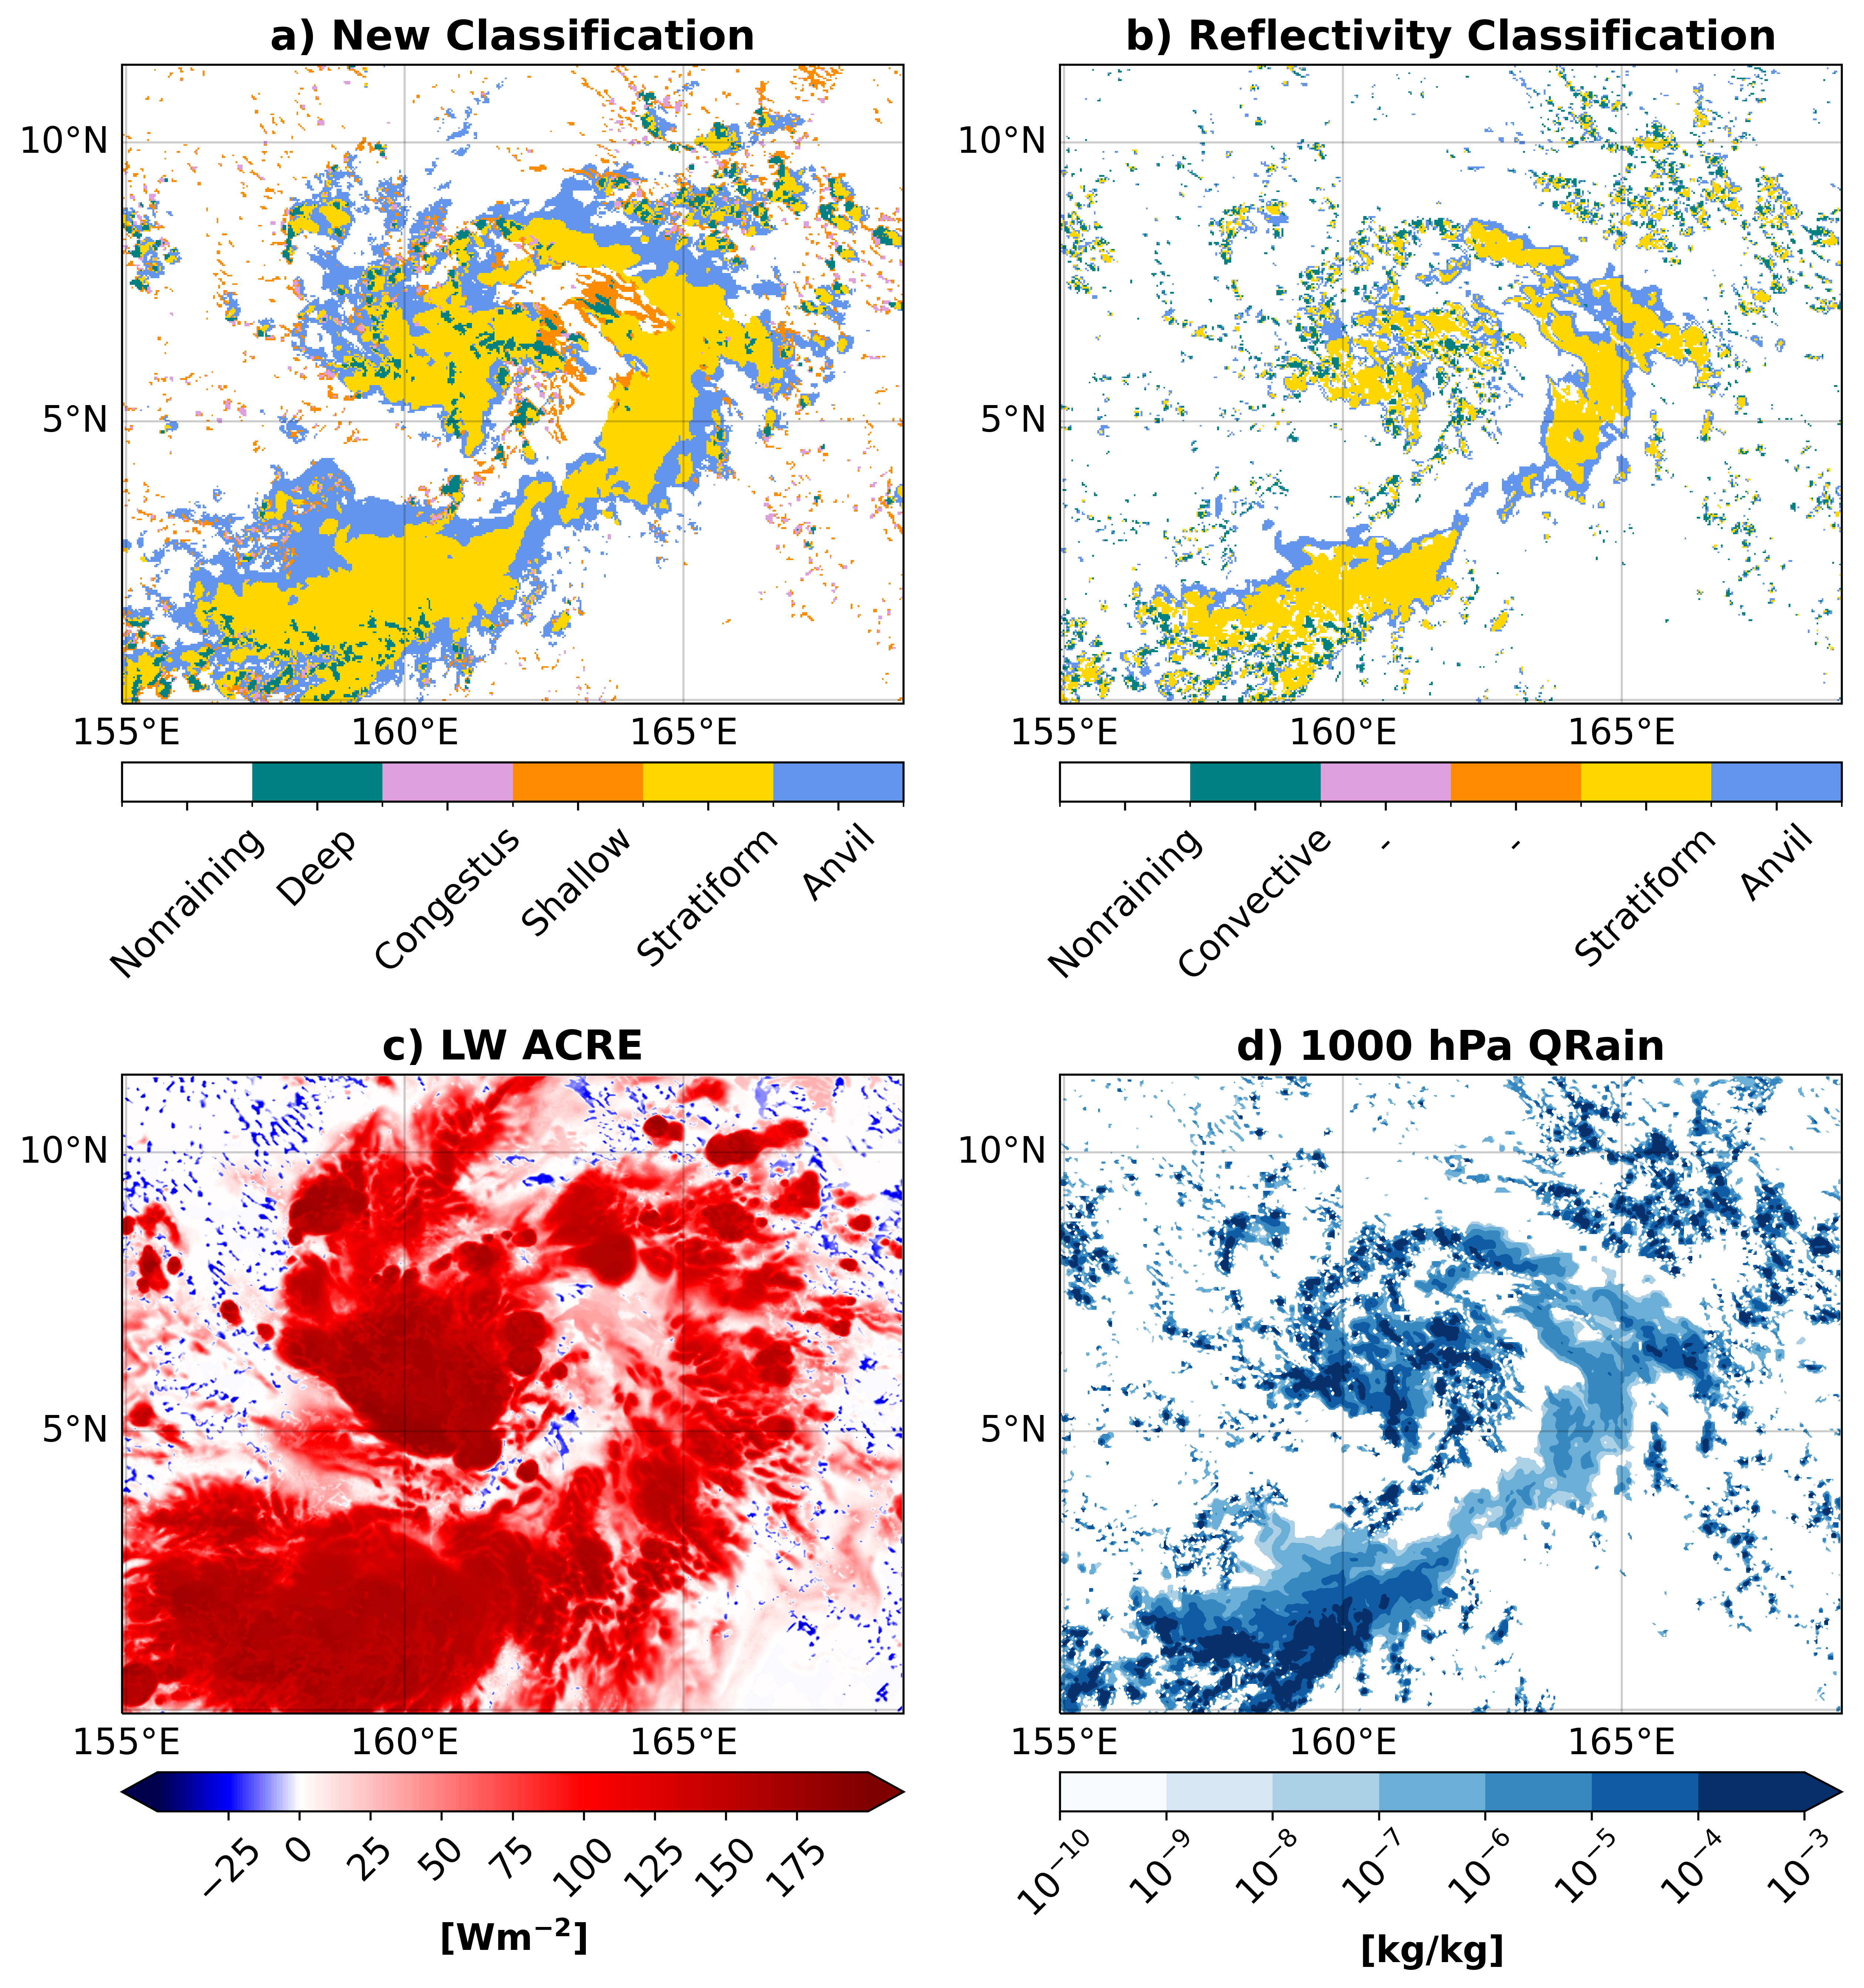

In [8]:
# Plot!

# colormap settings
bounds = np.array([-0.5, .5, 1.5, 2.5, 3.5, 4.5, 5.5])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=6)
nlevs = len(bounds) - 1
cmap = colors.ListedColormap(['white','teal', 'plum', 'darkorange', 'gold', 'cornflowerblue'])

lontick = np.arange(150,170,5) # define longitude ticks
lattick = np.arange(-5,15,5) # define latitude ticks

projection = ccrs.PlateCarree(central_longitude=180)

fig = plt.figure(figsize=(12,13), dpi=500)
fig.set_facecolor('white')
axs = fig.subplots(nrows=2, ncols=2, subplot_kw={'projection': projection})

# new algorithm
ax = axs[0,0]
ax.set_extent([l_edge,r_edge,b_edge,t_edge],crs=projection) # zoom in on convection
plot1 = ax.pcolormesh(lon[buf:xmax,ymin:ymax],lat[buf:xmax,ymin:ymax],c_type[0,36,buf:xmax,ymin:ymax], cmap=cmap, norm=norm, transform=projection)
cbar=plt.colorbar(plot1,ax=ax,fraction=0.05, pad=0.07, orientation = 'horizontal', ticks=(0,1,2,3,4,5))
cbar.set_ticklabels(['Nonraining','Deep', 'Congestus', 'Shallow', 'Stratiform', 'Anvil'])
cbar.ax.tick_params(labelsize=14, rotation=45)
grl=ax.gridlines(crs=projection,draw_labels=True,color='k',alpha=0.2)
grl.top_labels = False
grl.right_labels = False
grl.xlocator = ticker.FixedLocator(lontick)
grl.ylocator = ticker.FixedLocator(lattick)
ax.set_title("a) New Classification", size=16, weight='bold')

# traditional algorithm
c_type_og2 = np.copy(c_type_og)
c_type_og2[(c_type_og >= 2)] += 2
ax = axs[0,1]
ax.set_extent([l_edge,r_edge,b_edge,t_edge],crs=projection)
plot2 = ax.pcolormesh(lon[buf:xmax,ymin:ymax],lat[buf:xmax,ymin:ymax],c_type_og2[buf:xmax,ymin:ymax], cmap=cmap, norm=norm, transform=projection)
cbar=plt.colorbar(plot2,ax=ax,fraction=0.05, pad=0.07, orientation = 'horizontal', ticks=(0,1,2,3,4,5))
cbar.set_ticklabels(['Nonraining','Convective',' - ',' - ','Stratiform','Anvil'])
cbar.ax.tick_params(labelsize=14, rotation=45)
grl=ax.gridlines(crs=projection,draw_labels=True,color='k',alpha=0.2)
grl.top_labels = False
grl.right_labels = False
grl.xlocator = ticker.FixedLocator(lontick)
grl.ylocator = ticker.FixedLocator(lattick)
ax.set_title("b) Reflectivity Classification", size=16, weight='bold')

# LW ACRE
cmin = -50.; cmax = 201; cint = 1
clevs = np.round(np.arange(cmin,cmax,cint),1)
nlevs = len(clevs) - 1
divnorm=colors.TwoSlopeNorm(vmin=cmin, vcenter=0., vmax=cmax)
cmap = plt.get_cmap(name='seismic',lut=nlevs)
ax = axs[1,0]
ax.set_extent([l_edge,r_edge,b_edge,t_edge],crs=projection)
plot4 = ax.contourf(lon[buf:xmax,ymin:ymax],lat[buf:xmax,ymin:ymax],acre[buf:xmax,ymin:ymax], clevs, cmap=cmap, norm=divnorm, transform=projection, extend='both')
cbar=plt.colorbar(plot4,ax=ax,fraction=0.05, pad=0.07, orientation = 'horizontal', ticks=(-25,0,25,50,75,100,125,150,175))
cbar.ax.tick_params(labelsize=14, rotation=45)
cbar.set_label('[Wm$\mathbf{^{-2}}$]', weight='bold')
grl=ax.gridlines(crs=projection,draw_labels=True,color='k',alpha=0.2)
grl.top_labels = False
grl.right_labels = False
grl.xlocator = ticker.FixedLocator(lontick)
grl.ylocator = ticker.FixedLocator(lattick)
ax.set_title("c) LW ACRE", size=16, weight='bold')

# QRain
clevs = [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3]
nlevs = len(clevs) - 1
cmap = plt.get_cmap(name='Blues',lut=nlevs)
ax = axs[1,1]
ax.set_extent([l_edge,r_edge,b_edge,t_edge],crs=projection)
plot3 = ax.contourf(lon[buf:xmax,ymin:ymax],lat[buf:xmax,ymin:ymax],qrain[0,buf:xmax,ymin:ymax], clevs, cmap=cmap, norm=colors.LogNorm(), transform=projection, extend='max')
cbar=plt.colorbar(plot3,ax=ax,fraction=0.05, pad=0.07, orientation = 'horizontal', ticks=(1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3))
cticks = np.arange(0.1, 30, 5)
cbar.set_ticklabels(['$10^{-10}$','$10^{-9}$','$10^{-8}$','$10^{-7}$','$10^{-6}$','$10^{-5}$','$10^{-4}$','$10^{-3}$'])
cbar.ax.tick_params(labelsize=14, rotation=45)
cbar.set_label('[kg/kg]', weight='bold')
grl=ax.gridlines(crs=projection,draw_labels=True,color='k',alpha=0.2)
grl.top_labels = False
grl.right_labels = False
grl.xlocator = ticker.FixedLocator(lontick)
grl.ylocator = ticker.FixedLocator(lattick)
ax.set_title("d) 1000 hPa QRain", size=16, weight='bold')

In [9]:
# Function for calculating cloud type area fractions
def area_stats(label, total, npts):
    print('number of '+label+' points: ', total,'; domain fraction: ', 
        np.round(1e2*total/npts, decimals=2), '%')

In [10]:
# total points shown
nj,ni = np.shape(lon[buf:xmax,ymin:ymax])

In [11]:
print('Area fractions of each class:')
print()
print('New classification:')
print()
area_stats('deep convective', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==1), nj*ni)
area_stats('congestus', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==2), nj*ni)
area_stats('shallow convective', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==3), nj*ni)
area_stats('convective total', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==3)+np.sum(c_type[0,36,buf:xmax,ymin:ymax]==2)+np.sum(c_type[0,36,buf:xmax,ymin:ymax]==1), nj*ni)
area_stats('stratiform', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==4), nj*ni)
area_stats('anvil', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==5), nj*ni)
area_stats('strat + anvil', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==4)+np.sum(c_type[0,36,buf:xmax,ymin:ymax]==5), nj*ni)
area_stats('all-precip', np.sum(c_type[0,36,buf:xmax,ymin:ymax] > 0), nj*ni)
area_stats('non-raining', np.sum(c_type[0,36,buf:xmax,ymin:ymax]==0), nj*ni)

Area fractions of each class:

New classification:

number of deep convective points:  4591 ; domain fraction:  2.76 %
number of congestus points:  2317 ; domain fraction:  1.39 %
number of shallow convective points:  6728 ; domain fraction:  4.04 %
number of convective total points:  13636 ; domain fraction:  8.19 %
number of stratiform points:  27345 ; domain fraction:  16.42 %
number of anvil points:  23290 ; domain fraction:  13.99 %
number of strat + anvil points:  50635 ; domain fraction:  30.41 %
number of all-precip points:  64271 ; domain fraction:  38.6 %
number of non-raining points:  102229 ; domain fraction:  61.4 %


In [12]:
print('Reflectivity classification:')
print()
area_stats('convective', np.sum(c_type_og[buf:xmax,ymin:ymax]==1), nj*ni)
area_stats('stratiform', np.sum(c_type_og[buf:xmax,ymin:ymax]==2), nj*ni)
area_stats('anvil', np.sum(c_type_og[buf:xmax,ymin:ymax]==3), nj*ni)
area_stats('strat + anvil', np.sum(c_type_og[buf:xmax,ymin:ymax]==2)+np.sum(c_type_og[buf:xmax,ymin:ymax]==3), nj*ni)
area_stats('all-precip', np.sum(c_type_og[buf:xmax,ymin:ymax] > 0), nj*ni)
area_stats('non-raining', np.sum(c_type_og[buf:xmax,ymin:ymax]==0), nj*ni)

Reflectivity classification:

number of convective points:  5877 ; domain fraction:  3.53 %
number of stratiform points:  16801 ; domain fraction:  10.09 %
number of anvil points:  11621 ; domain fraction:  6.98 %
number of strat + anvil points:  28422 ; domain fraction:  17.07 %
number of all-precip points:  34299 ; domain fraction:  20.6 %
number of non-raining points:  132201 ; domain fraction:  79.4 %


In [13]:
# Comparing the number of identified columns containing cloud vs. LW ACRE columns with heating/cooling
cloud_ind = (c_type[0,36,buf:xmax,ymin:ymax] != 0) # everywhere but non-precipitating
cloud_ind_og = (c_type_og2[buf:xmax,ymin:ymax] != 0) # everywhere but non-precipitating
acre_ind = ((acre[buf:xmax,ymin:ymax] > 5) | (acre[buf:xmax,ymin:ymax] < -5)) # warming/cooling
print(print(np.sum(acre_ind)))

frac = np.sum(cloud_ind)/np.sum(acre_ind)
frac_og = np.sum(cloud_ind_og)/np.sum(acre_ind)
frac_diff = (np.sum(cloud_ind)-np.sum(cloud_ind_og))/np.sum(acre_ind)

print('New class - ACRE fraction: ', frac*100)
print('Trad class - ACRE fraction: ', frac_og*100)
print('Diff - ACRE fraction: ', frac_diff*100)

132260
None
New class - ACRE fraction:  48.59443520338726
Trad class - ACRE fraction:  25.933010736428248
Diff - ACRE fraction:  22.66142446695902
